In [1]:
%load_ext autoreload
%autoreload 2

import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import ctvis


In [2]:
p = glob('public_covid_data/rp_im/*')
df = ctvis.get_df_all3()
index = 4
volume = ctvis.load_nifti(df.iloc[index]['FilePathImage'])
mask = ctvis.load_nifti(df.iloc[index]['FilePathMask'])
mask_color = ctvis.label_color(mask)

In [3]:
# 今2次元なので3次元(RGB)にする np.stackにて追加
# 最大値を取得
maxhu = np.max(volume)
# 最小値を取得
minhu = np.min(volume)
# 数値を0-1に変換 0になったらinfinityになるのでmax関数で0なら10-3乗(０．００1)にする
volume_rerange = (volume - minhu ) / max((maxhu - minhu), 1e-3)
# 値 * 255にする
volume_rerange = volume_rerange * 255

# 3次元(RGB)するため、stackで追加する。axisの-1で最後に追加
volume_rerange = np.stack([volume_rerange, volume_rerange, volume_rerange], axis=-1)
#volume_rerange = volume_rerange.astype(np.uint8)

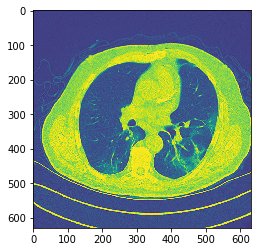

In [9]:
plt.imshow(volume_rerange[:, :, 30])

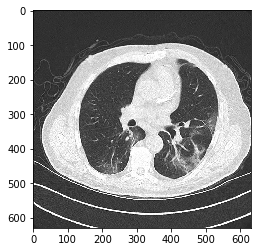

In [12]:
plt.imshow(volume_rerange[:, :, 30], cmap='gray')

In [3]:
volume_gray = ctvis.hu_to_gray(volume)

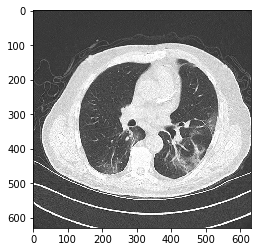

In [4]:
plt.imshow(volume_gray[:, :, 30])

In [11]:
volume_gray

array([[[[119, 119, 119],
         [105, 105, 105],
         [ 81,  81,  81],
         ...,
         [ 40,  40,  40],
         [ 54,  54,  54],
         [105, 105, 105]],

        [[ 81,  81,  81],
         [ 81,  81,  81],
         [ 67,  67,  67],
         ...,
         [ 81,  81,  81],
         [ 81,  81,  81],
         [ 81,  81,  81]],

        [[ 67,  67,  67],
         [ 81,  81,  81],
         [ 67,  67,  67],
         ...,
         [133, 133, 133],
         [105, 105, 105],
         [ 81,  81,  81]],

        ...,

        [[ 81,  81,  81],
         [ 81,  81,  81],
         [119, 119, 119],
         ...,
         [ 81,  81,  81],
         [ 81,  81,  81],
         [ 81,  81,  81]],

        [[ 81,  81,  81],
         [105, 105, 105],
         [ 81,  81,  81],
         ...,
         [ 81,  81,  81],
         [ 67,  67,  67],
         [ 81,  81,  81]],

        [[ 81,  81,  81],
         [119, 119, 119],
         [ 54,  54,  54],
         ...,
         [ 81,  81,  81],
        